In [1]:
# import the important libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Mahesh\ML_project\aps_failure_training_set.csv',na_values="na")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [5]:
df.shape

(36188, 171)

In [6]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

### Checking missing values

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt

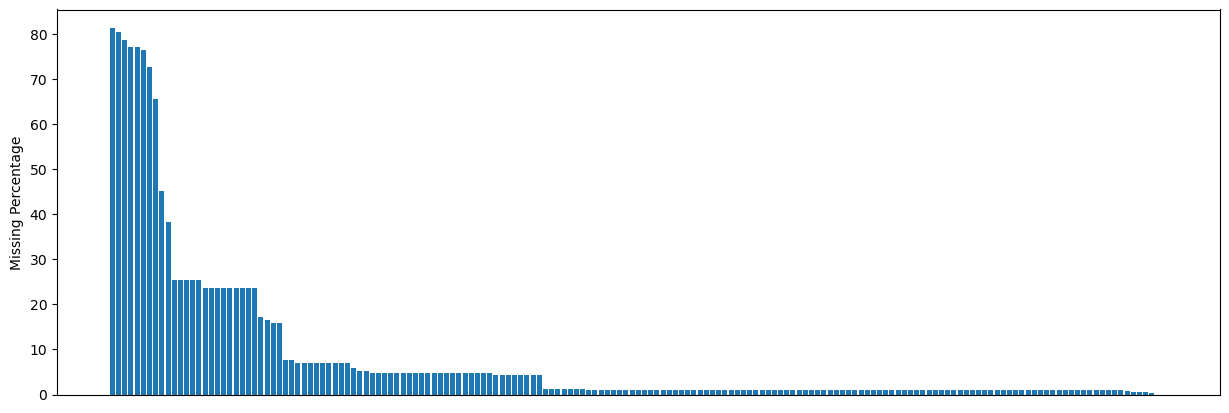

In [17]:
# Plotting the missing values count for each column
fig, ax = plt.subplots(figsize = (15,5))
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending= False)


ax.bar(missing.index,missing.values.T[0])
plt.xticks([])
plt.ylabel('Missing Percentage')
plt.show()

In [10]:
df.shape[0]

36188

In [23]:
# drop the columns which  has missing value more than 70% 

dropcols = missing[missing[0] > 70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [25]:
list(dropcols.index)

['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000']

In [26]:
df.drop(list(dropcols.index),axis =1,inplace= True)

In [27]:
df.shape

(36188, 164)

In [30]:
# define the numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))

print('we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 163 numerical features : ['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003'

In [29]:
df['class']

0        pos
1        pos
2        pos
3        pos
4        pos
        ... 
36183    neg
36184    neg
36185    neg
36186    neg
36187    neg
Name: class, Length: 36188, dtype: object

<Axes: xlabel='class', ylabel='count'>

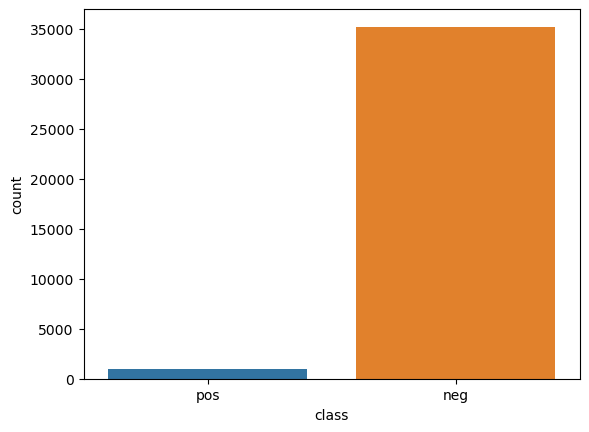

In [31]:
sns.countplot(data=df,x='class')